In [90]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import  accuracy_score
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
songs = pd.read_csv('./data/spotify.csv')
spotify_blues = pd.read_csv('./data/spotify_blues.csv')
spotify_country = pd.read_csv('./data/spotify_country.csv')
spotify_electronic = pd.read_csv('./data/spotify_electronic.csv')
spotify_hip_hop = pd.read_csv('./data/spotify_hip_hop.csv')
spotify_jazz = pd.read_csv('./data/spotify_jazz.csv')
spotify_pop = pd.read_csv('./data/spotify_pop.csv')
spotify_rap = pd.read_csv('./data/spotify_rap.csv')
spotify_reggae = pd.read_csv('./data/spotify_reggae.csv')
spotify_rnb = pd.read_csv('./data/spotify_rnb.csv')
spotify_rock = pd.read_csv('./data/spotify_rock.csv')
spotify_mix= pd.read_csv('./data/spotify.csv')


In [69]:
songs_original = pd.concat([songs, spotify_blues, spotify_country, spotify_electronic, 
                       spotify_hip_hop, spotify_jazz, spotify_pop, 
                       spotify_rap, spotify_reggae, spotify_rnb, spotify_rock,
                       spotify_mix], 
                      ignore_index=True)

In [70]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1000 non-null   object 
 1   Genre             1000 non-null   object 
 2   Artist            1000 non-null   object 
 3   id                1000 non-null   object 
 4   title_spotify     1000 non-null   object 
 5   album             1000 non-null   object 
 6   sp_popularity     1000 non-null   float64
 7   colab             1000 non-null   object 
 8   release_date      1000 non-null   object 
 9   danceability      1000 non-null   float64
 10  energy            1000 non-null   float64
 11  loudness          1000 non-null   float64
 12  speechiness       1000 non-null   float64
 13  acousticness      1000 non-null   float64
 14  instrumentalness  1000 non-null   float64
 15  liveness          1000 non-null   float64
 16  valence           1000 non-null   float64
 

**Colab está en Y o N que pase a booleano**

In [71]:
songs['release_date'] = pd.to_datetime(songs['release_date'], errors='coerce')
songs['colab'] = songs['colab'].replace({'Y': True, 'N': False})

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_35583/1601697439.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  songs['colab'] = songs['colab'].replace({'Y': True, 'N': False})


In [72]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             1000 non-null   object        
 1   Genre             1000 non-null   object        
 2   Artist            1000 non-null   object        
 3   id                1000 non-null   object        
 4   title_spotify     1000 non-null   object        
 5   album             1000 non-null   object        
 6   sp_popularity     1000 non-null   float64       
 7   colab             1000 non-null   bool          
 8   release_date      922 non-null    datetime64[ns]
 9   danceability      1000 non-null   float64       
 10  energy            1000 non-null   float64       
 11  loudness          1000 non-null   float64       
 12  speechiness       1000 non-null   float64       
 13  acousticness      1000 non-null   float64       
 14  instrumentalness  1000 no

In [73]:
songs.dropna(inplace=True)
songs.reset_index(drop=True, inplace=True)

In [74]:
songs = pd.get_dummies(songs, columns=['Genre'], drop_first=True)
songs.reset_index(drop=True, inplace=True)

In [75]:
songs.columns

Index(['Title', 'Artist', 'id', 'title_spotify', 'album', 'sp_popularity',
       'colab', 'release_date', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'key', 'mode', 'tempo', 'duration', 'Genre_blues',
       'Genre_classical', 'Genre_country', 'Genre_disco', 'Genre_electronic',
       'Genre_folk', 'Genre_hip hop', 'Genre_house', 'Genre_indie',
       'Genre_jazz', 'Genre_latin', 'Genre_metal', 'Genre_pop', 'Genre_punk',
       'Genre_r&b', 'Genre_reggae', 'Genre_rock', 'Genre_ska', 'Genre_soul'],
      dtype='object')

In [76]:
songs.drop(columns=['Genre_classical'], inplace=True)

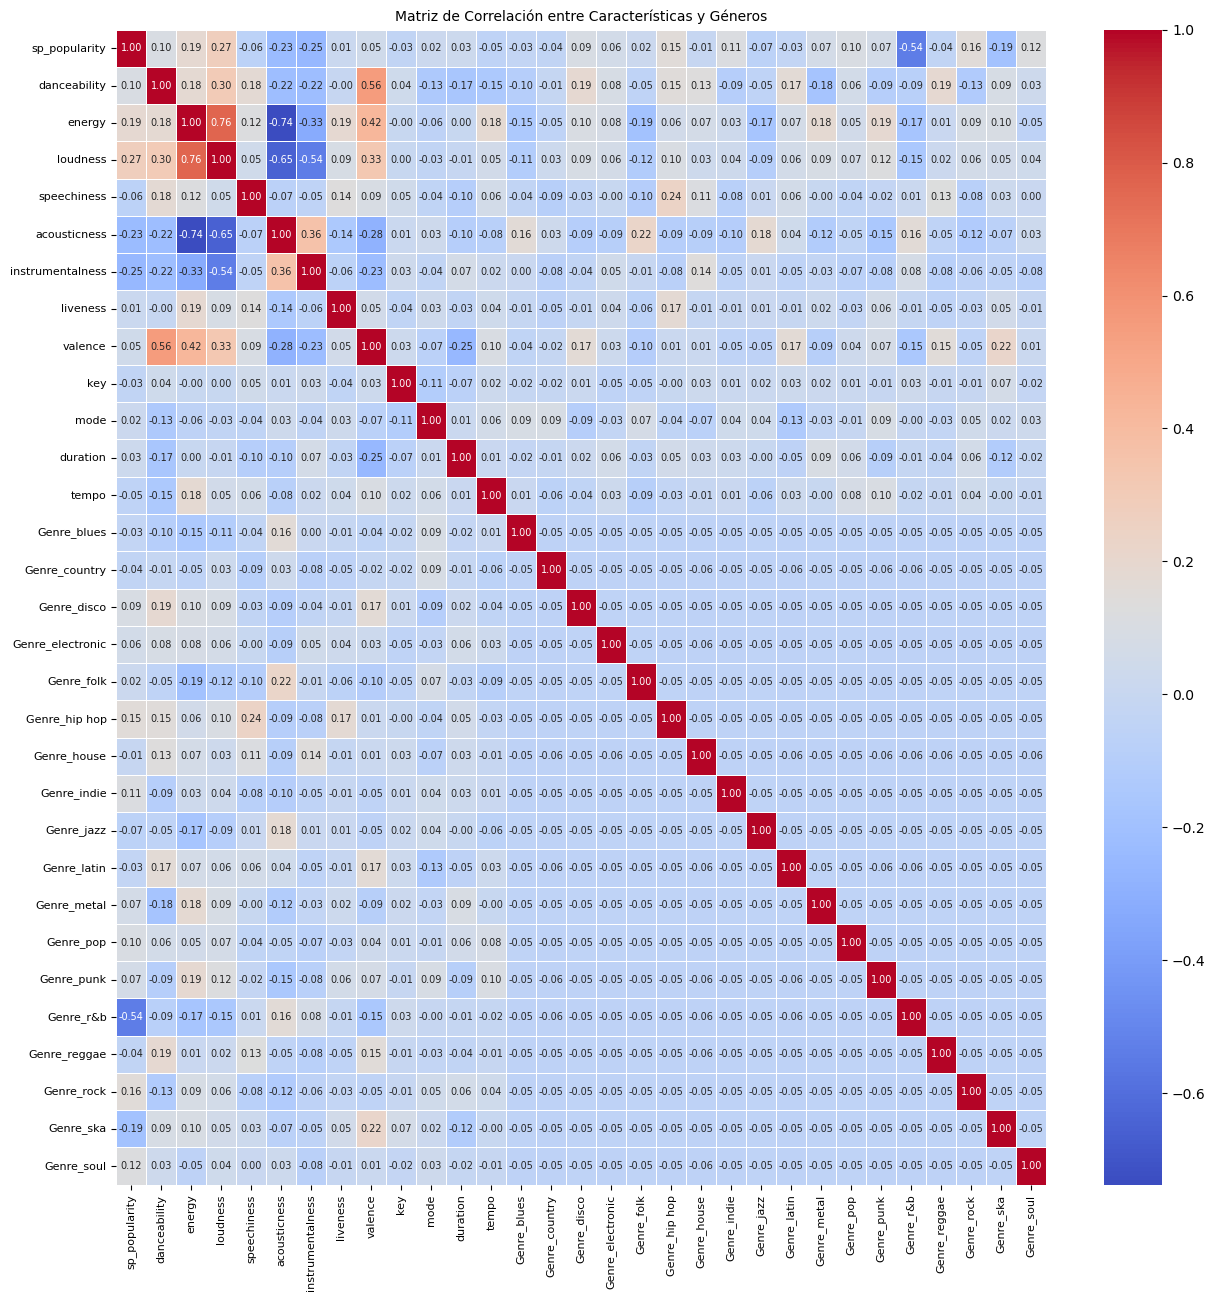

In [77]:
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']

# Variables de género (todas son binarias: True/False)
genre_columns = [col for col in songs.columns if col.startswith('Genre_')]

# Filtrar las columnas relevantes para la correlación
columns_to_correlate = numerical_features + genre_columns

# Crear una matriz de correlación entre estas columnas
corr_matrix = songs[columns_to_correlate].corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})  # "annot_kws" controla el tamaño de las anotaciones
plt.xticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje X
plt.yticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje Y
plt.title('Matriz de Correlación entre Características y Géneros', fontsize=10)

plt.show()

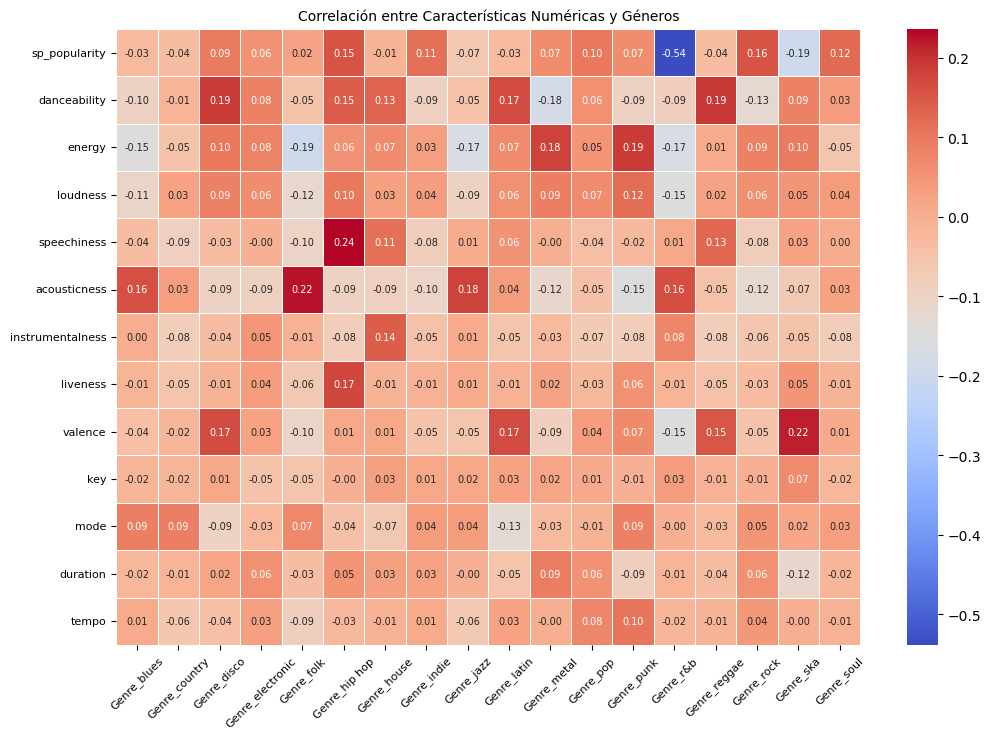

In [78]:

# Seleccionar las columnas numéricas y los géneros
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']
genre_columns = [col for col in songs.columns if col.startswith('Genre_')]

# Filtrar las columnas relevantes para la correlación (numéricas y géneros)
columns_to_correlate = numerical_features + genre_columns

# Crear la matriz de correlación entre características numéricas y géneros
corr_matrix = songs[columns_to_correlate].corr()

# Filtrar para mostrar solo las correlaciones entre las características numéricas y los géneros
corr_genres = corr_matrix.loc[numerical_features, genre_columns]

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))

# Aplicar formato para mostrar solo 2 decimales en las anotaciones
sns.heatmap(corr_genres, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})
plt.xticks(fontsize=8, rotation=45)  # Cambiar el tamaño y rotación de las etiquetas del eje X
plt.yticks(fontsize=8)  # Cambiar el tamaño de las etiquetas del eje Y
plt.title('Correlación entre Características Numéricas y Géneros', fontsize=10)

plt.show()


In [79]:
target_columns = [col for col in songs.columns if col.startswith('Genre_')]

X = songs[['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']]
y = songs[[col for col in songs.columns if col.startswith('Genre_')]]

X = X.dropna()
y = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear el modelo de KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos

# MultiOutputClassifier para manejar varios targets (géneros)
multi_target_knn = MultiOutputClassifier(knn)

# Entrenar el modelo
multi_target_knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = multi_target_knn.predict(X_test)

# Evaluar el desempeño
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo multietiqueta KNN: {accuracy:.4f}")

Precisión del modelo multietiqueta KNN: 0.0973


In [80]:
for genre in y.columns:
    model = LogisticRegression(max_iter=2000)  
    model.fit(X_train, y_train[genre])
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Imprimir el reporte de clasificación para cada género
    print(f"Reporte de clasificación para {genre}:")
    print(classification_report(y_test[genre], predictions))

Reporte de clasificación para Genre_blues:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       175
        True       0.00      0.00      0.00        10

    accuracy                           0.95       185
   macro avg       0.47      0.50      0.49       185
weighted avg       0.89      0.95      0.92       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_country:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       171
        True       0.00      0.00      0.00        14

    accuracy                           0.92       185
   macro avg       0.46      0.50      0.48       185
weighted avg       0.85      0.92      0.89       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_disco:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       176
        True       0.00      0.00      0.00         9

    accuracy                           0.95       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.91      0.95      0.93       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_electronic:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       177
        True       0.00      0.00      0.00         8

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.92      0.96      0.94       185

Reporte de clasificación para Genre_folk:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       177
        True       0.00      0.00      0.00         8

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.92      0.96      0.94       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_hip hop:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       179
        True       0.00      0.00      0.00         6

    accuracy                           0.97       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.94      0.97      0.95       185

Reporte de clasificación para Genre_house:
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       173
        True       0.00      0.00      0.00        12

    accuracy                           0.93       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.87      0.93      0.90       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_indie:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       178
        True       0.00      0.00      0.00         7

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.93      0.96      0.94       185

Reporte de clasificación para Genre_jazz:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       178
        True       0.00      0.00      0.00         7

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.93      0.96      0.94       185

Reporte de clasificación para Genre_latin:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       177
        True       0.00      0.00      0.00         8

    accuracy                           0.96       185


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_metal:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       180
        True       0.00      0.00      0.00         5

    accuracy                           0.97       185
   macro avg       0.49      0.50      0.49       185
weighted avg       0.95      0.97      0.96       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_pop:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       179
        True       0.00      0.00      0.00         6

    accuracy                           0.97       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.94      0.97      0.95       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_punk:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       177
        True       0.00      0.00      0.00         8

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.92      0.96      0.94       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_r&b:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       174
        True       0.80      0.36      0.50        11

    accuracy                           0.96       185
   macro avg       0.88      0.68      0.74       185
weighted avg       0.95      0.96      0.95       185

Reporte de clasificación para Genre_reggae:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       171
        True       0.00      0.00      0.00        14

    accuracy                           0.92       185
   macro avg       0.46      0.50      0.48       185
weighted avg       0.85      0.92      0.89       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_rock:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       170
        True       0.00      0.00      0.00        15

    accuracy                           0.92       185
   macro avg       0.46      0.50      0.48       185
weighted avg       0.84      0.92      0.88       185

Reporte de clasificación para Genre_ska:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       177
        True       0.00      0.00      0.00         8

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.92      0.96      0.94       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_soul:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       174
        True       0.00      0.00      0.00        11

    accuracy                           0.94       185
   macro avg       0.47      0.50      0.48       185
weighted avg       0.88      0.94      0.91       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

In [81]:
# Crear y entrenar el modelo de Random Forest
for genre in y.columns:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train[genre])
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Imprimir el reporte de clasificación para cada género
    print(f"Reporte de clasificación para {genre}:")
    print(classification_report(y_test[genre], predictions))

Reporte de clasificación para Genre_blues:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       175
        True       0.00      0.00      0.00        10

    accuracy                           0.93       185
   macro avg       0.47      0.49      0.48       185
weighted avg       0.89      0.93      0.91       185

Reporte de clasificación para Genre_country:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       171
        True       0.00      0.00      0.00        14

    accuracy                           0.91       185
   macro avg       0.46      0.49      0.48       185
weighted avg       0.85      0.91      0.88       185

Reporte de clasificación para Genre_disco:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       176
        True       0.00      0.00      0.00         9

    accuracy                           0.94       1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_pop:
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       179
        True       0.00      0.00      0.00         6

    accuracy                           0.95       185
   macro avg       0.48      0.49      0.49       185
weighted avg       0.94      0.95      0.94       185

Reporte de clasificación para Genre_punk:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       177
        True       0.00      0.00      0.00         8

    accuracy                           0.96       185
   macro avg       0.48      0.50      0.49       185
weighted avg       0.92      0.96      0.94       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_r&b:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       174
        True       0.80      0.36      0.50        11

    accuracy                           0.96       185
   macro avg       0.88      0.68      0.74       185
weighted avg       0.95      0.96      0.95       185

Reporte de clasificación para Genre_reggae:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       171
        True       0.00      0.00      0.00        14

    accuracy                           0.92       185
   macro avg       0.46      0.50      0.48       185
weighted avg       0.85      0.92      0.89       185



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_rock:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       170
        True       0.00      0.00      0.00        15

    accuracy                           0.90       185
   macro avg       0.46      0.49      0.47       185
weighted avg       0.84      0.90      0.87       185

Reporte de clasificación para Genre_ska:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       177
        True       0.00      0.00      0.00         8

    accuracy                           0.95       185
   macro avg       0.48      0.49      0.49       185
weighted avg       0.91      0.95      0.93       185

Reporte de clasificación para Genre_soul:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       174
        True       0.00      0.00      0.00        11

    accuracy                           0.91       185
   

In [82]:
model = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [83]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.10      0.12        10
           1       0.09      0.07      0.08        14
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         8
           4       0.12      0.12      0.12         8
           5       0.11      0.17      0.13         6
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         7
           9       0.20      0.38      0.26         8
          10       0.18      0.40      0.25         5
          11       0.00      0.00      0.00         6
          12       0.20      0.12      0.15         8
          13       0.33      0.27      0.30        11
          14       0.29      0.14      0.19        14
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00         8
          17       0.00    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***PROBAMOS SIN DUMMIES***


In [84]:
songs_original

,Title,Genre,Artist,id,title_spotify,album,sp_popularity,colab,release_date,danceability,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,key,mode,tempo,duration
0,Feel Good Inc.,pop,Gorillaz,0d28khcov6AiegSCpG5TuT,Feel Good Inc.,Demon Days,82.0,N,2005-05-23,0.818,...,-6.679,0.1770,0.00836,0.002330,0.613,0.772,6.0,1.0,138.559,222640.0
1,Yellow,pop,Coldplay,3AJwUDP919kvQ9QcozQPxg,Yellow,Parachutes,89.0,N,2000-07-10,0.429,...,-7.227,0.0281,0.00239,0.000121,0.234,0.285,11.0,1.0,173.372,266773.0
2,Viva la Vida,pop,Coldplay,1mea3bSkSGXuIRvnydlB5b,Viva La Vida,Viva La Vida or Death and All His Friends,86.0,N,2008-05-26,0.486,...,-7.115,0.0287,0.09540,0.000003,0.109,0.417,5.0,0.0,138.015,242373.0
3,Poker Face,pop,Lady Gaga,5R8dQOPq8haW94K7mgERlO,Poker Face,The Fame,76.0,N,2008-01-01,0.851,...,-4.618,0.0787,0.11900,0.000002,0.121,0.774,4.0,1.0,119.001,237200.0
4,The Scientist,pop,Coldplay,75JFxkI2RXiU7L9VXzMkle,The Scientist,A Rush of Blood to the Head,85.0,N,2002-08-27,0.557,...,-7.224,0.0243,0.73100,0.000015,0.110,0.213,5.0,1.0,146.277,309600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,Fluorescent Adolescent,alternative,Arctic Monkeys,7e8utCy2JlSB8dRHKi49xM,Fluorescent Adolescent,Favourite Worst Nightmare (Standard Version),69.0,N,2007-04-24,0.646,...,-5.290,0.0288,0.00178,0.000023,0.144,0.821,6.0,0.0,112.115,173493.0
2850,Basket Case,alternative,Green Day,6L89mwZXSOwYl76YXfX13s,Basket Case,Dookie,82.0,N,1994-02-01,0.442,...,-3.205,0.0602,0.00293,0.000009,0.091,0.781,3.0,1.0,85.064,181533.0
2851,The Less I Know the Better,alternative,Tame Impala,6K4t31amVTZDgR3sKmwUJJ,The Less I Know The Better,Currents,84.0,N,2015-07-17,0.640,...,-4.083,0.0284,0.01150,0.006780,0.167,0.785,4.0,1.0,116.879,216320.0
2852,Summertime Sadness,alternative,Lana Del Rey,2dBwB667LHQkLhdYlwLUZK,Summertime Sadness,Born To Die - The Paradise Edition,66.0,N,2012-11-12,0.565,...,-6.826,0.0335,0.05420,0.000002,0.122,0.235,1.0,0.0,111.968,265427.0


In [86]:
songs_original = songs_original.dropna(subset=['Genre'])
songs_original['Genre'] = songs_original['Genre'].astype('category')

In [87]:
# Seleccionar las características numéricas
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']  # Añade más características si es necesario
X = songs_original[numerical_features]

# El target (género), en formato categórico
y = songs_original['Genre']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy:.4f}")

Precisión del modelo Random Forest: 0.4481


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Blues       0.34      0.48      0.40        23
     Country       0.53      0.38      0.44        26
  Electronic       0.29      0.31      0.30        16
     Hip Hop       0.28      0.18      0.22        28
        Jazz       0.62      0.61      0.62        33
         Pop       0.15      0.06      0.09        32
         R&B       0.35      0.35      0.35        26
         Rap       0.31      0.36      0.33        25
      Reggae       0.50      0.43      0.46        21
        Rock       0.35      0.42      0.39        26
 alternative       0.03      0.04      0.04        27
       blues       0.67      0.44      0.53        41
   classical       0.78      0.78      0.78        27
     country       0.45      0.79      0.58        24
       disco       0.62      0.62      0.62        29
  electronic       0.58      0.28      0.37        40
        folk       0.47      0.53      0.50        30
     hip hop       0.38    

ajustamos el modelo porque hay desbalance de clases

In [89]:
# Seleccionar las características numéricas
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']  # Añade más características si es necesario
X = songs_original[numerical_features]

# El target (género), en formato categórico
y = songs_original['Genre']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy:.4f}")

Precisión del modelo Random Forest: 0.4411


Vemos que va peor aún, vamos a probar con SMOTE para solucionar el desbalance